# Pass maps

A pass map allows us to see all of the passes a player or a team made in a match, season, etc.

Pass maps are good for a couple of things:
1. Locating & clustering passes to see where passes are usually starting from or ending
2. Looking at length of passing
3. Finding trends in if a player is playing back passes, forward passes, etc.

Pass maps are not helpful if we just plot every single pass on there. A pass map should look to create value.

So in this section, we'll look at creating a pass map by plotting all of Enzo Fernandez's passes that entered the final third in the World Cup Final

In [25]:
# Let's get our data
import pandas as pd
from statsbombpy import sb

df = sb.events(match_id=3869685)

In [26]:
# Let's find Enzo in our dataframe
print(df.player.value_counts())

player
Enzo Fernandez                     328
Rodrigo Javier De Paul             242
Lionel Andrés Messi Cuccittini     242
Nicolás Hernán Otamendi            215
Jules Koundé                       211
Aurélien Djani Tchouaméni          205
Cristian Gabriel Romero            203
Dayotchanculle Upamecano           198
Alexis Mac Allister                196
Raphaël Varane                     182
Adrien Rabiot                      176
Nicolás Alejandro Tagliafico       165
Julián Álvarez                     150
Kylian Mbappé Lottin               149
Theo Bernard François Hernández    145
Nahuel Molina Lucero               142
Ángel Fabián Di María Hernández    132
Randal Kolo Muani                  127
Marcus Thuram                      119
Marcos Javier Acuña                112
Antoine Griezmann                  103
Hugo Lloris                         97
Kingsley Coman                      85
Damián Emiliano Martínez            83
Eduardo Camavinga                   83
Gonzalo Ariel Mont

In [27]:
# and lets filter it to just Enzo & only passes
df = df[(df['player'] == 'Enzo Fernandez') & (df['type'] == "Pass")]

In [28]:
df.head(15)

,50_50,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,...,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,team_id,timestamp,type,under_pressure
48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Argentina,779,00:03:43.780,Pass,NaN
70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Argentina,779,00:04:54.065,Pass,NaN
102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Argentina,779,00:07:09.412,Pass,NaN
107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Argentina,779,00:07:25.776,Pass,NaN
128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Argentina,779,00:11:36.630,Pass,NaN
132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Argentina,779,00:11:48.798,Pass,NaN
149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Argentina,779,00:13:30.285,Pass,NaN
169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Argentina,779,00:14:52.428,Pass,NaN
175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Argentina,779,00:15:09.982,Pass,NaN
177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Argentina,779,00:15:12.415,Pass,NaN


In [29]:
df.columns

Index(['50_50', 'bad_behaviour_card', 'ball_receipt_outcome',
       'ball_recovery_offensive', 'ball_recovery_recovery_failure',
       'block_deflection', 'block_offensive', 'carry_end_location',
       'clearance_aerial_won', 'clearance_body_part', 'clearance_head',
       'clearance_left_foot', 'clearance_other', 'clearance_right_foot',
       'counterpress', 'dribble_nutmeg', 'dribble_outcome', 'dribble_overrun',
       'duel_outcome', 'duel_type', 'duration', 'foul_committed_advantage',
       'foul_committed_card', 'foul_committed_offensive',
       'foul_committed_penalty', 'foul_committed_type', 'foul_won_advantage',
       'foul_won_defensive', 'foul_won_penalty', 'goalkeeper_body_part',
       'goalkeeper_end_location', 'goalkeeper_outcome', 'goalkeeper_position',
       'goalkeeper_technique', 'goalkeeper_type', 'id', 'index',
       'interception_outcome', 'location', 'match_id', 'minute', 'off_camera',
       'out', 'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id'

In [30]:
# We only need a few columns since we have filtered the dataframe to just Enzo's passes
# If we had not filtered the dataframe, we would want to include the player, recipients, etc.
df = df[['location', 'pass_end_location', 'pass_outcome']]

In [31]:
df.head()

,location,pass_end_location,pass_outcome
48,"[54.8, 37.8]","[56.5, 60.5]",NaN
70,"[56.5, 39.7]","[66.4, 42.9]",Incomplete
102,"[34.3, 50.2]","[38.8, 53.4]",NaN
107,"[88.0, 23.9]","[93.7, 20.3]",Incomplete
128,"[33.9, 51.1]","[112.1, 58.1]",Incomplete


In [32]:
# We need to do a little bit of prep work
# 1. Convert location and pass_end_location to x, y columns
# 2. Fill in NaN values of pass_outcome with "Complete"
df[['x', 'y']] = df['location'].apply(pd.Series)
df[['end_x', 'end_y']] = df['pass_end_location'].apply(pd.Series)
df['pass_outcome'] = df['pass_outcome'].fillna("Complete")

In [33]:
df.head()

,location,pass_end_location,pass_outcome,x,y,end_x,end_y
48,"[54.8, 37.8]","[56.5, 60.5]",Complete,54.8,37.8,56.5,60.5
70,"[56.5, 39.7]","[66.4, 42.9]",Incomplete,56.5,39.7,66.4,42.9
102,"[34.3, 50.2]","[38.8, 53.4]",Complete,34.3,50.2,38.8,53.4
107,"[88.0, 23.9]","[93.7, 20.3]",Incomplete,88.0,23.9,93.7,20.3
128,"[33.9, 51.1]","[112.1, 58.1]",Incomplete,33.9,51.1,112.1,58.1


In [34]:
# Now let's calculate all passes that entered the final third
# This means that the x value of the pass_end_location is greater than or equal to 80 while the x value of the location is less than 80
df['entered_final_third'] = (df['end_x'] >= 80) & (df['x'] < 80)

In [35]:
df.entered_final_third.value_counts()

entered_final_third
False    83
True     11
Name: count, dtype: int64

In [36]:
df = df[df['entered_final_third'] == True]

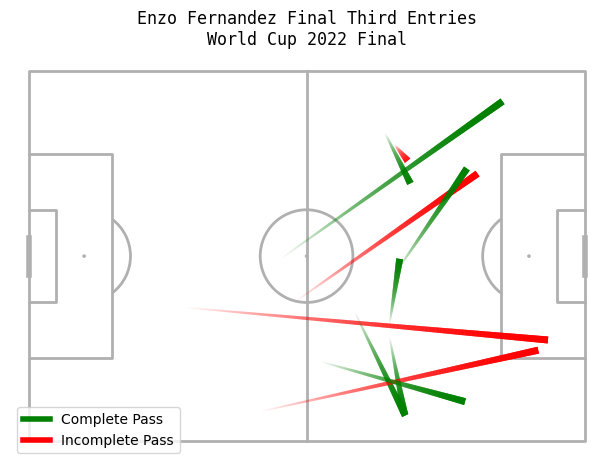

In [85]:
# Now we can plot the passes that entered the final third.
# Will will color code the passes based on the outcome
from mplsoccer import Pitch

pitch = Pitch(pitch_type='statsbomb')

fig, ax = pitch.draw()
for x in df.to_dict(orient='records'):
    
    # We'll use the pitch.lines method to plot the passes
    if x['pass_outcome'] == "Complete":
        pitch.lines(x['x'], x['y'], x['end_x'], x['end_y'], lw=5, transparent=True, comet=True, ax=ax, color='g')
    else:
        pitch.lines(x['x'], x['y'], x['end_x'], x['end_y'], lw=5, transparent=True, comet=True, ax=ax, color='r')
        
    # if we wanted to we could use pitch.arrows to plot the passes
    # if x['pass_outcome'] == "Complete":
    #     pitch.arrows(x['x'], x['y'], x['end_x'], x['end_y'], ax=ax, color='b')
    # else:
    #     pitch.arrows(x['x'], x['y'], x['end_x'], x['end_y'], ax=ax, color='r')

# Lets add a title
ax.set_title("Enzo Fernandez Final Third Entries\nWorld Cup 2022 Final", fontsize=12, fontfamily='monospace')

# We can also add a legend
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], color='g', lw=4, label='Complete Pass'),
    Line2D([0], [0], color='r', lw=4, label='Incomplete Pass')
]

ax.legend(handles=legend_elements, loc='lower left')